In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sqlite3 as sql
%matplotlib inline

In [3]:
calls_2018 = pd.read_csv('../data/police_calls_2018.csv')

In [4]:
hub = pd.read_csv('../data/hubNashville_2018.csv')

In [5]:
conn = sql.connect('../data/metro_survey.db')
cur = conn.cursor()

In [6]:
calls_2018 = calls_2018.rename(columns = {
    'Event Number': 'event_number',
    'Call Received': 'call_received',
    'Complaint Number': 'complaint_number',
    'Shift': 'shift',
    'Tencode': 'tencode',
    'Tencode Description': 'tencode_desc',
    'Disposition Code': 'disp_code',
    'Disposition Description': 'disp_desc',
    'Block': 'block',
    'Street Name': 'street_name',
    'Unit Dispatched': 'unit_disp',
    'Sector': 'sector',
    'Zone': 'zone',
    'Latitude': 'lat',
    'Longitude': 'lon',
    'PO': 'po'})

In [7]:
calls_2018.head()

,event_number,call_received,complaint_number,shift,tencode,tencode_desc,disp_code,disp_desc,block,street_name,unit_disp,sector,zone,lat,lon,geometry,zipcode,po
0,PD201800174484,02/16/2018 07:09:00 PM,20180155542,B,93,Traffic Violation,3,CITATION - TRAFFIC,600.0,ALBANY DR,521B,H,23,36.210,-86.600,POINT (-86.59999999999999 36.21),37076,HERMITAGE
1,PD201800174650,02/16/2018 08:02:00 PM,20180155684,B,93,Traffic Violation,9,SUBJECT WARNED,5800.0,OLD HICKORY BLVD,5F34,H,21,36.169,-86.601,POINT (-86.601 36.169),37076,HERMITAGE
2,PD201800175038,02/16/2018 10:16:00 PM,20180156001,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,3700.0,JAMES KAY LN,521B,H,21,36.178,-86.616,POINT (-86.616 36.178),37076,HERMITAGE
3,PD201800174217,02/16/2018 05:58:00 PM,20180155321,B,87,Safety Hazard,3,CITATION - TRAFFIC,0.0,MM 221 4 I40 E,5122,H,23,36.170,-86.591,POINT (-86.59100000000001 36.17),37076,HERMITAGE
4,PD201800173907,02/16/2018 04:19:00 PM,20180155047,B,93,Traffic Violation,9,SUBJECT WARNED,1300.0,TULIP GROVE RD,521B,H,23,36.175,-86.596,POINT (-86.596 36.175),37076,HERMITAGE


In [8]:
calls_2018['tencode_desc'].value_counts()

Business Check                                 155317
Traffic Violation                              142824
Want Officer for Investigation / Assistance    122040
Administrative/Special Assignment               38204
Community Policing Activity                     34166
Suspicious Person                               28700
Disorderly Person                               28128
Vehicle Accident - Property Damage              28027
Safety Hazard                                   25510
Burglary - Residence                            18017
Burglary - Non-Residence                        17153
Theft                                           15642
Investigate 911 Hang-Up Call                    14116
Vehicle Blocking Right of Way                    7495
Vehicle Accident - Personal Injury               7489
Fight / Assault                                  5096
Shots Fired                                      4619
Fixed Post                                       2750
Meal Break                  

In [9]:
calls_2018.shape

(718021, 18)

In [10]:
top_calls = calls_2018.loc[calls_2018['tencode_desc'].isin(['Business Check', 'Traffic Violation', 'Want Officer for Investigation / Assistance', 'Administrative/Special Assignment', 'Community Policing Activity'])]

In [11]:
top_calls.head()

,event_number,call_received,complaint_number,shift,tencode,tencode_desc,disp_code,disp_desc,block,street_name,unit_disp,sector,zone,lat,lon,geometry,zipcode,po
0,PD201800174484,02/16/2018 07:09:00 PM,20180155542,B,93,Traffic Violation,3,CITATION - TRAFFIC,600.0,ALBANY DR,521B,H,23,36.210,-86.600,POINT (-86.59999999999999 36.21),37076,HERMITAGE
1,PD201800174650,02/16/2018 08:02:00 PM,20180155684,B,93,Traffic Violation,9,SUBJECT WARNED,5800.0,OLD HICKORY BLVD,5F34,H,21,36.169,-86.601,POINT (-86.601 36.169),37076,HERMITAGE
2,PD201800175038,02/16/2018 10:16:00 PM,20180156001,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,3700.0,JAMES KAY LN,521B,H,21,36.178,-86.616,POINT (-86.616 36.178),37076,HERMITAGE
4,PD201800173907,02/16/2018 04:19:00 PM,20180155047,B,93,Traffic Violation,9,SUBJECT WARNED,1300.0,TULIP GROVE RD,521B,H,23,36.175,-86.596,POINT (-86.596 36.175),37076,HERMITAGE
5,PD201800174595,02/16/2018 07:41:00 PM,20180155635,B,43,Want Officer for Investigation / Assistance,5,GONE ON ARRIVAL,500.0,DEBBIE DR,523B,H,23,36.210,-86.585,POINT (-86.58499999999999 36.21),37076,HERMITAGE


In [12]:
top_calls.shape

(492551, 18)

In [13]:
business_calls = calls_2018.loc[calls_2018['tencode_desc'].isin(['Business Check'])]

In [14]:
business_calls.head()

,event_number,call_received,complaint_number,shift,tencode,tencode_desc,disp_code,disp_desc,block,street_name,unit_disp,sector,zone,lat,lon,geometry,zipcode,po
25,PD201800175080,02/16/2018 10:29:00 PM,20180156029,B,96,Business Check,12,LOCATION/BUILDING SECURE,3500.0,CENTRAL PKE,517B,H,21,36.186,-86.629,POINT (-86.62899999999999 36.186),37076,HERMITAGE
26,PD201800175062,02/16/2018 10:22:00 PM,20180156016,B,96,Business Check,15,COMMUNITY POLICING,5800.0,OLD HICKORY BLVD,523B,H,21,36.169,-86.601,POINT (-86.601 36.169),37076,HERMITAGE
28,PD201800173682,02/16/2018 02:57:00 PM,20180154828,A,96,Business Check,15,COMMUNITY POLICING,5800.0,OLD HICKORY BLVD,521B,H,21,36.167,-86.600,POINT (-86.59999999999999 36.167),37076,HERMITAGE
36,PD201800174383,02/16/2018 06:39:00 PM,20180155454,B,96,Business Check,15,COMMUNITY POLICING,300.0,OLD LEBANON DIRT RD,5F34,H,21,36.191,-86.615,POINT (-86.61499999999999 36.191),37076,HERMITAGE
40,PD201800173520,02/16/2018 01:51:00 PM,20180154732,A,96,Business Check,12,LOCATION/BUILDING SECURE,5000.0,OLD HICKORY BLVD,523A,H,21,36.193,-86.616,POINT (-86.616 36.193),37076,HERMITAGE


In [15]:
business_calls.shape

(155317, 18)

In [16]:
business_calls = business_calls['zipcode'].value_counts()
business_calls.head()

37209    17745
37203    17662
37115    11908
37221    10847
37207    10620
Name: zipcode, dtype: int64

In [17]:
business_calls = business_calls.reset_index()

In [18]:
business_calls.head()

,index,zipcode
0,37209,17745
1,37203,17662
2,37115,11908
3,37221,10847
4,37207,10620


In [19]:
business_calls.columns = ['zipcode','call_number']

In [20]:
business_calls.head()

,zipcode,call_number
0,37209,17745
1,37203,17662
2,37115,11908
3,37221,10847
4,37207,10620


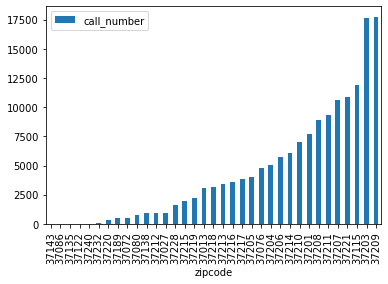

In [21]:
business_calls.sort_values('call_number').plot(kind = 'bar', 
                 x = 'zipcode', 
                 y = 'call_number');

In [22]:
business_calls = business_calls.sort_values('call_number')

Text(0.5, 1.0, 'Business Check Calls')

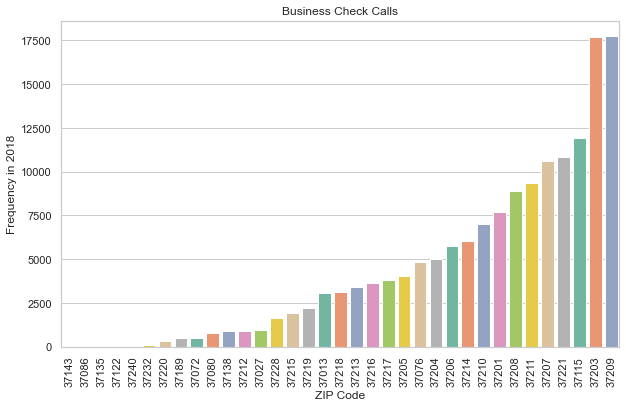

In [23]:
#why cant i get this to sort by call freq?
plt.figure(figsize = (10, 6))
sns.set(style="whitegrid")
sns.barplot(x = 'zipcode',
           y = 'call_number',
           data = business_calls,
           palette = 'Set2',
           order = business_calls.sort_values('call_number').zipcode)
plt.xlabel('ZIP Code')
plt.ylabel('Frequency in 2018')
plt.xticks(rotation=90)
plt.title('Business Check Calls')

In [24]:
traffic_calls = calls_2018.loc[calls_2018['tencode_desc'].isin(['Traffic Violation'])]

In [25]:
traffic_calls.head()

,event_number,call_received,complaint_number,shift,tencode,tencode_desc,disp_code,disp_desc,block,street_name,unit_disp,sector,zone,lat,lon,geometry,zipcode,po
0,PD201800174484,02/16/2018 07:09:00 PM,20180155542,B,93,Traffic Violation,3,CITATION - TRAFFIC,600.0,ALBANY DR,521B,H,23,36.210,-86.600,POINT (-86.59999999999999 36.21),37076,HERMITAGE
1,PD201800174650,02/16/2018 08:02:00 PM,20180155684,B,93,Traffic Violation,9,SUBJECT WARNED,5800.0,OLD HICKORY BLVD,5F34,H,21,36.169,-86.601,POINT (-86.601 36.169),37076,HERMITAGE
4,PD201800173907,02/16/2018 04:19:00 PM,20180155047,B,93,Traffic Violation,9,SUBJECT WARNED,1300.0,TULIP GROVE RD,521B,H,23,36.175,-86.596,POINT (-86.596 36.175),37076,HERMITAGE
6,PD201800174695,02/16/2018 08:13:00 PM,20180155710,B,93,Traffic Violation,9,SUBJECT WARNED,0.0,CENTRAL PKE & OLD HICKORY BLVD,5F36,H,21,36.174,-86.602,POINT (-86.602 36.174),37076,HERMITAGE
12,PD201800173998,02/16/2018 04:52:00 PM,20180155121,B,93,Traffic Violation,9,SUBJECT WARNED,0.0,ROCKWOOD DR & TULIP GROVE RD,521B,H,23,36.176,-86.595,POINT (-86.595 36.176),37076,HERMITAGE


In [26]:
traffic_calls = traffic_calls['zipcode'].value_counts()
traffic_calls = traffic_calls.reset_index()
traffic_calls.head()

,index,zipcode
0,37207,13029
1,37209,12770
2,37211,12530
3,37206,12442
4,37203,12080


In [27]:
traffic_calls.columns = ['zipcode', 'call_number']
traffic_calls.head()

,zipcode,call_number
0,37207,13029
1,37209,12770
2,37211,12530
3,37206,12442
4,37203,12080


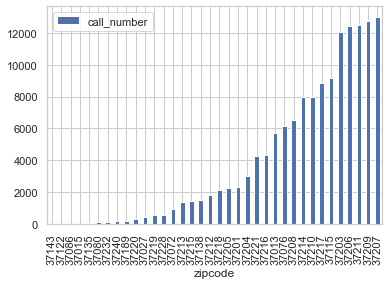

In [28]:
traffic_calls.sort_values('call_number').plot(kind = 'bar', 
                 x = 'zipcode', 
                 y = 'call_number');

Text(0.5, 1.0, 'Traffic Violation Calls')

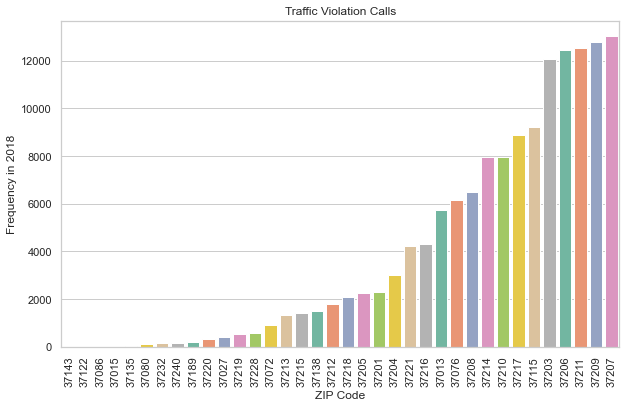

In [29]:
#i want this in order!
plt.figure(figsize = (10, 6))
sns.set(style="whitegrid")
sns.barplot(x = 'zipcode',
           y = 'call_number',
           data = traffic_calls,
           palette = 'Set2', 
           order = traffic_calls.sort_values('call_number').zipcode)
plt.xlabel('ZIP Code')
plt.ylabel('Frequency in 2018')
plt.xticks(rotation=90)
plt.title('Traffic Violation Calls')

In [30]:
assistance_calls = calls_2018.loc[calls_2018['tencode_desc'].isin(['Want Officer for Investigation / Assistance'])]

In [31]:
assistance_calls.head()

,event_number,call_received,complaint_number,shift,tencode,tencode_desc,disp_code,disp_desc,block,street_name,unit_disp,sector,zone,lat,lon,geometry,zipcode,po
5,PD201800174595,02/16/2018 07:41:00 PM,20180155635,B,43,Want Officer for Investigation / Assistance,5,GONE ON ARRIVAL,500.0,DEBBIE DR,523B,H,23,36.210,-86.585,POINT (-86.58499999999999 36.21),37076,HERMITAGE
7,PD201800174666,02/16/2018 08:06:00 PM,20180156242,B,43,Want Officer for Investigation / Assistance,5,GONE ON ARRIVAL,0.0,LEBANON PKE & JACKSONIAN DR,523C,H,21,36.193,-86.624,POINT (-86.624 36.193),37076,HERMITAGE
8,PD201800174681,02/16/2018 08:10:00 PM,20180155701,B,43,Want Officer for Investigation / Assistance,4,ASSISTED CITIZEN,5700.0,CHESTNUTWOOD TRL,523B,H,23,36.161,-86.577,POINT (-86.57700000000001 36.161),37076,HERMITAGE
10,PD201800175046,02/16/2018 10:17:00 PM,20180156250,B,43,Want Officer for Investigation / Assistance,4,ASSISTED CITIZEN,3900.0,BELL RD,521C,H,21,36.167,-86.606,POINT (-86.60600000000001 36.167),37076,HERMITAGE
19,PD201800174990,02/16/2018 09:59:00 PM,20180155966,B,43,Want Officer for Investigation / Assistance,6,ASSISTED OTHER UNIT,5700.0,OLD HICKORY BLVD,523B,H,23,36.174,-86.602,POINT (-86.602 36.174),37076,HERMITAGE


In [32]:
assistance_calls = assistance_calls['zipcode'].value_counts()
assistance_calls.head()

37211    11507
37203    10840
37207    10669
37115     8433
37013     8196
Name: zipcode, dtype: int64

In [33]:
assistance_calls = assistance_calls.reset_index()

In [34]:
assistance_calls.head()

,index,zipcode
0,37211,11507
1,37203,10840
2,37207,10669
3,37115,8433
4,37013,8196


In [35]:
assistance_calls.columns = ['zipcode','call_number']
assistance_calls.head()

,zipcode,call_number
0,37211,11507
1,37203,10840
2,37207,10669
3,37115,8433
4,37013,8196


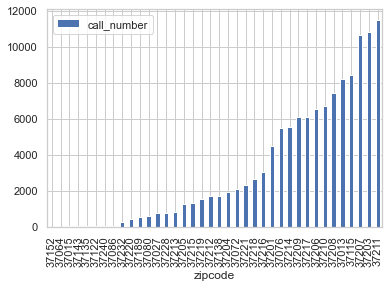

In [36]:
assistance_calls.sort_values('call_number').plot(kind = 'bar', 
                 x = 'zipcode', 
                 y = 'call_number');

Text(0.5, 1.0, 'Police Assistance Calls')

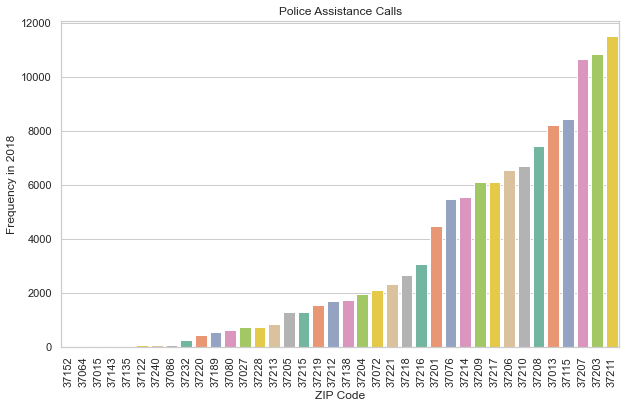

In [37]:
#in order plz
plt.figure(figsize = (10, 6))
sns.set(style="whitegrid")
sns.barplot(x = 'zipcode',
           y = 'call_number',
           data = assistance_calls,
           palette = 'Set2', 
           order = assistance_calls.sort_values('call_number').zipcode)
plt.xlabel('ZIP Code')
plt.ylabel('Frequency in 2018')
plt.xticks(rotation=90)
plt.title('Police Assistance Calls')

In [38]:
admin_calls = calls_2018.loc[calls_2018['tencode_desc'].isin(['Administrative/Special Assignment'])]

In [39]:
admin_calls.head()

,event_number,call_received,complaint_number,shift,tencode,tencode_desc,disp_code,disp_desc,block,street_name,unit_disp,sector,zone,lat,lon,geometry,zipcode,po
2,PD201800175038,02/16/2018 10:16:00 PM,20180156001,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,3700.0,JAMES KAY LN,521B,H,21,36.178,-86.616,POINT (-86.616 36.178),37076,HERMITAGE
20,PD201800175107,02/16/2018 10:42:00 PM,20180156049,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,3700.0,JAMES KAY LN,511B,H,21,36.178,-86.616,POINT (-86.616 36.178),37076,HERMITAGE
21,PD201800175032,02/16/2018 10:12:00 PM,20180155995,B,3,Administrative/Special Assignment,4,ASSISTED CITIZEN,3700.0,JAMES KAY LN,515B,H,21,36.178,-86.616,POINT (-86.616 36.178),37076,HERMITAGE
37,PD201800173642,02/16/2018 02:45:00 PM,20180154799,A,3,Administrative/Special Assignment,4,ASSISTED CITIZEN,3700.0,JAMES KAY LN,523B,H,21,36.178,-86.616,POINT (-86.616 36.178),37076,HERMITAGE
41,PD201800173418,02/16/2018 01:19:00 PM,20180154660,A,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,3700.0,JAMES KAY LN,5F22,H,21,36.178,-86.616,POINT (-86.616 36.178),37076,HERMITAGE


In [40]:
admin_calls = admin_calls['zipcode'].value_counts()
admin_calls.head()

37201    5675
37217    4812
37203    4501
37207    3395
37219    2802
Name: zipcode, dtype: int64

In [41]:
admin_calls = admin_calls.reset_index()
admin_calls.head()

,index,zipcode
0,37201,5675
1,37217,4812
2,37203,4501
3,37207,3395
4,37219,2802


In [42]:
admin_calls.columns = ['zipcode','call_number']

In [43]:
admin_calls.head()

,zipcode,call_number
0,37201,5675
1,37217,4812
2,37203,4501
3,37207,3395
4,37219,2802


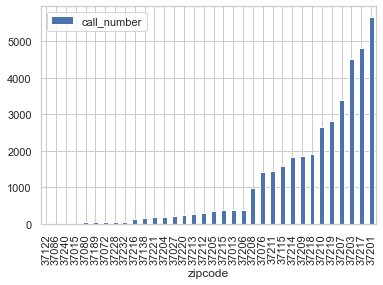

In [44]:
admin_calls.sort_values('call_number').plot(kind = 'bar', 
                 x = 'zipcode', 
                 y = 'call_number');

Text(0.5, 1.0, 'Administrative Calls')

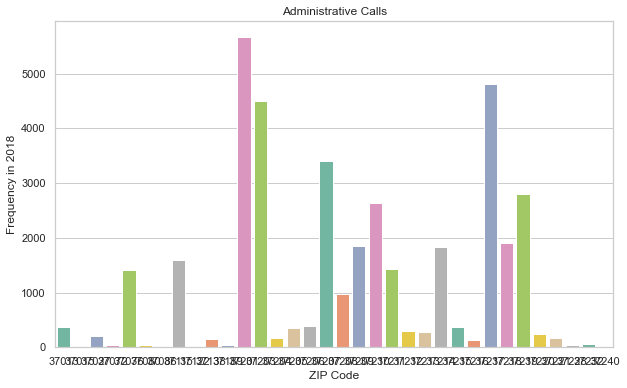

In [45]:
#in orderrrr
plt.figure(figsize = (10, 6))
sns.set(style="whitegrid")
sns.barplot(x = 'zipcode',
           y = 'call_number',
           data = admin_calls,
           palette = 'Set2')
plt.xlabel('ZIP Code')
plt.ylabel('Frequency in 2018')
plt.title('Administrative Calls')

In [46]:
community_calls = calls_2018.loc[calls_2018['tencode_desc'].isin(['Community Policing Activity'])]

In [47]:
community_calls.head()

,event_number,call_received,complaint_number,shift,tencode,tencode_desc,disp_code,disp_desc,block,street_name,unit_disp,sector,zone,lat,lon,geometry,zipcode,po
9,PD201800174730,02/16/2018 08:32:00 PM,20180155741,B,15,Community Policing Activity,15,COMMUNITY POLICING,4100.0,LEBANON PKE,522B,H,21,36.199,-86.619,POINT (-86.619 36.199),37076,HERMITAGE
16,PD201800174137,02/16/2018 05:35:00 PM,20180155247,B,15,Community Policing Activity,12,LOCATION/BUILDING SECURE,3700.0,BELL RD,2945,H,33,36.157,-86.619,POINT (-86.619 36.157),37076,HERMITAGE
27,PD201800173829,02/16/2018 03:49:00 PM,20180154973,B,15,Community Policing Activity,15,COMMUNITY POLICING,400.0,TYLER DR,522B,H,23,36.199,-86.612,POINT (-86.61200000000001 36.199),37076,HERMITAGE
47,PD201800174013,02/16/2018 04:56:00 PM,20180155132,B,15,Community Policing Activity,15,COMMUNITY POLICING,4400.0,LEBANON PKE,522B,H,23,36.214,-86.598,POINT (-86.598 36.214),37076,HERMITAGE
78,PD201800176670,02/17/2018 12:52:00 PM,20180157438,A,15,Community Policing Activity,15,COMMUNITY POLICING,5000.0,OLD HICKORY BLVD,511A,H,21,36.194,-86.617,POINT (-86.617 36.194),37076,HERMITAGE


In [48]:
community_calls = community_calls['zipcode'].value_counts()
community_calls.head()

37209    6482
37203    3935
37221    2998
37201    2064
37206    1903
Name: zipcode, dtype: int64

In [49]:
community_calls = community_calls.reset_index()

In [50]:
community_calls.head()

,index,zipcode
0,37209,6482
1,37203,3935
2,37221,2998
3,37201,2064
4,37206,1903


In [51]:
community_calls.columns = ['zipcode','call_number']
community_calls.head()

,zipcode,call_number
0,37209,6482
1,37203,3935
2,37221,2998
3,37201,2064
4,37206,1903


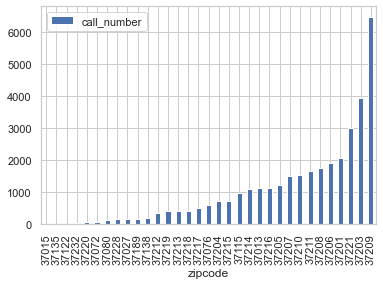

In [52]:
community_calls.sort_values('call_number').plot(kind = 'bar', 
                 x = 'zipcode', 
                 y = 'call_number');

Text(0.5, 1.0, 'Community Policing Activity Calls')

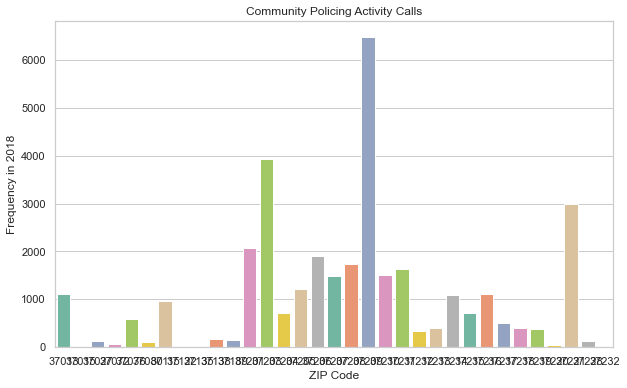

In [53]:
#freq in seq!
plt.figure(figsize = (10, 6))
sns.set(style="whitegrid")
sns.barplot(x = 'zipcode',
           y = 'call_number',
           data = community_calls,
           palette = 'Set2')
plt.xlabel('ZIP Code')
plt.ylabel('Frequency in 2018')
plt.title('Community Policing Activity Calls')

In [54]:
#start of looking for info on more criminal/violent stuff
problem_calls = calls_2018.loc[calls_2018['tencode_desc'].isin(['Burglary - Residence', 'Fight / Assault', 'Holdup / Robbery', 'Shooting', 'Cutting / Stabbing'])]
problem_calls.shape

(25849, 18)

In [55]:
problem_calls.head()

,event_number,call_received,complaint_number,shift,tencode,tencode_desc,disp_code,disp_desc,block,street_name,unit_disp,sector,zone,lat,lon,geometry,zipcode,po
15,PD201800173891,02/16/2018 04:13:00 PM,20180155057,B,70,Burglary - Residence,6,ASSISTED OTHER UNIT,100.0,TULIP GROVE PT,522B,H,23,36.180,-86.597,POINT (-86.59700000000001 36.18),37076,HERMITAGE
17,PD201800174151,02/16/2018 05:39:00 PM,20180155313,B,57,Fight / Assault,5,GONE ON ARRIVAL,5600.0,FRIST BLVD,521B,H,21,36.176,-86.608,POINT (-86.60799999999999 36.176),37076,HERMITAGE
18,PD201800174764,02/16/2018 08:43:00 PM,0,B,70,Burglary - Residence,11,DISREGARD / SIGNAL 9,400.0,ROCKWOOD DR,NaN,H,23,36.176,-86.596,POINT (-86.596 36.176),37076,HERMITAGE
57,PD201800176186,02/17/2018 07:58:00 AM,20180157061,A,70,Burglary - Residence,11,DISREGARD / SIGNAL 9,3100.0,EARHART RD,523A,H,23,36.167,-86.571,POINT (-86.571 36.167),37076,HERMITAGE
87,PD201800177095,02/17/2018 04:42:00 PM,0,B,70,Burglary - Residence,11,DISREGARD / SIGNAL 9,200.0,SCOTTS CREEK TRL,NaN,H,23,36.204,-86.593,POINT (-86.59299999999999 36.204),37076,HERMITAGE


In [56]:
burglary_res_calls = calls_2018.loc[calls_2018['tencode_desc'].isin(['Burglary - Residence'])]
burglary_res_calls.head()

,event_number,call_received,complaint_number,shift,tencode,tencode_desc,disp_code,disp_desc,block,street_name,unit_disp,sector,zone,lat,lon,geometry,zipcode,po
15,PD201800173891,02/16/2018 04:13:00 PM,20180155057,B,70,Burglary - Residence,6,ASSISTED OTHER UNIT,100.0,TULIP GROVE PT,522B,H,23,36.180,-86.597,POINT (-86.59700000000001 36.18),37076,HERMITAGE
18,PD201800174764,02/16/2018 08:43:00 PM,0,B,70,Burglary - Residence,11,DISREGARD / SIGNAL 9,400.0,ROCKWOOD DR,NaN,H,23,36.176,-86.596,POINT (-86.596 36.176),37076,HERMITAGE
57,PD201800176186,02/17/2018 07:58:00 AM,20180157061,A,70,Burglary - Residence,11,DISREGARD / SIGNAL 9,3100.0,EARHART RD,523A,H,23,36.167,-86.571,POINT (-86.571 36.167),37076,HERMITAGE
87,PD201800177095,02/17/2018 04:42:00 PM,0,B,70,Burglary - Residence,11,DISREGARD / SIGNAL 9,200.0,SCOTTS CREEK TRL,NaN,H,23,36.204,-86.593,POINT (-86.59299999999999 36.204),37076,HERMITAGE
103,PD201800176537,02/17/2018 11:33:00 AM,0,A,70,Burglary - Residence,11,DISREGARD / SIGNAL 9,700.0,RACHELS TRL,NaN,H,23,36.205,-86.605,POINT (-86.605 36.205),37076,HERMITAGE


In [57]:
burglary_res_calls = burglary_res_calls['zipcode'].value_counts()
burglary_res_calls.head()

37013    2044
37207    1420
37211    1335
37215    1176
37206    1137
Name: zipcode, dtype: int64

In [58]:
burglary_res_calls = burglary_res_calls.reset_index()
burglary_res_calls.columns = ['zipcode', 'call_number']
burglary_res_calls.head()

,zipcode,call_number
0,37013,2044
1,37207,1420
2,37211,1335
3,37215,1176
4,37206,1137


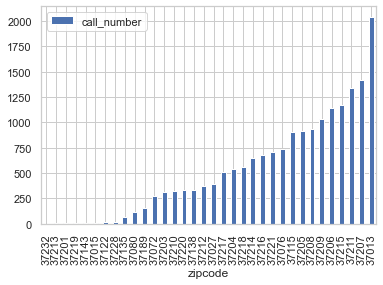

In [59]:
burglary_res_calls.sort_values('call_number').plot(kind = 'bar', 
                 x = 'zipcode', 
                 y = 'call_number');

Text(0.5, 1.0, 'Residential Burglary')

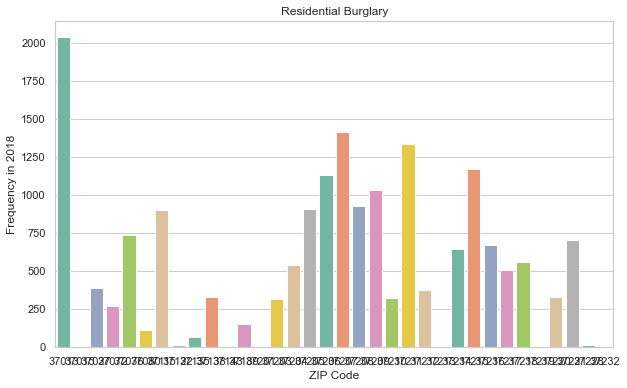

In [60]:
plt.figure(figsize = (10, 6))
sns.set(style="whitegrid")
sns.barplot(x = 'zipcode',
           y = 'call_number',
           data = burglary_res_calls,
           palette = 'Set2')
plt.xlabel('ZIP Code')
plt.ylabel('Frequency in 2018')
plt.title('Residential Burglary')

In [61]:
assault_calls = calls_2018.loc[calls_2018['tencode_desc'].isin(['Fight / Assault'])]
assault_calls.head()

,event_number,call_received,complaint_number,shift,tencode,tencode_desc,disp_code,disp_desc,block,street_name,unit_disp,sector,zone,lat,lon,geometry,zipcode,po
17,PD201800174151,02/16/2018 05:39:00 PM,20180155313,B,57,Fight / Assault,5,GONE ON ARRIVAL,5600.0,FRIST BLVD,521B,H,21,36.176,-86.608,POINT (-86.60799999999999 36.176),37076,HERMITAGE
130,PD201800177965,02/17/2018 09:04:00 PM,20180159180,B,57,Fight / Assault,5,GONE ON ARRIVAL,5600.0,FRIST BLVD,523C,H,21,36.176,-86.608,POINT (-86.60799999999999 36.176),37076,HERMITAGE
197,PD201800180534,02/18/2018 06:48:00 PM,0,B,57,Fight / Assault,11,DISREGARD / SIGNAL 9,5600.0,OLD HICKORY BLVD,NaN,H,23,36.174,-86.602,POINT (-86.602 36.174),37076,HERMITAGE
302,PD201800186545,02/20/2018 10:11:00 AM,20180166645,A,57,Fight / Assault,14,ASSISTANCE REFUSED,5600.0,FRIST BLVD,523B,H,21,36.176,-86.608,POINT (-86.60799999999999 36.176),37076,HERMITAGE
526,PD201800193706,02/22/2018 04:03:00 AM,20180172247,C,57,Fight / Assault,6,ASSISTED OTHER UNIT,5400.0,OLD HICKORY BLVD,522C,H,21,36.183,-86.609,POINT (-86.60899999999999 36.183),37076,HERMITAGE


In [62]:
assault_calls = assault_calls['zipcode'].value_counts()
assault_calls.head()

37203    529
37201    471
37207    460
37211    394
37208    391
Name: zipcode, dtype: int64

In [63]:
assault_calls = assault_calls.reset_index()
assault_calls.columns = ['zipcode', 'call_number']
assault_calls.head()

,zipcode,call_number
0,37203,529
1,37201,471
2,37207,460
3,37211,394
4,37208,391


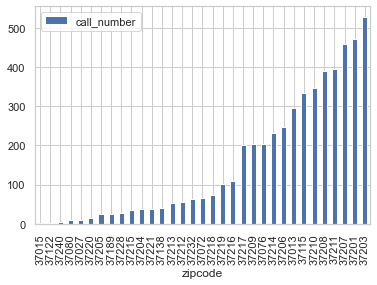

In [64]:
assault_calls.sort_values('call_number').plot(kind = 'bar', 
                 x = 'zipcode', 
                 y = 'call_number');

Text(0.5, 1.0, 'Fight/Assault Calls')

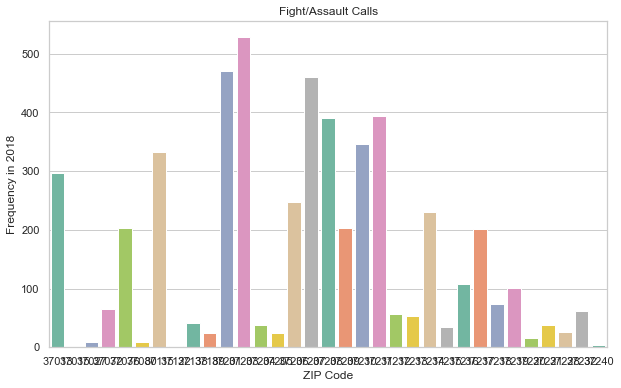

In [65]:
plt.figure(figsize = (10, 6))
sns.set(style="whitegrid")
sns.barplot(x = 'zipcode',
           y = 'call_number',
           data = assault_calls,
           palette = 'Set2')
plt.xlabel('ZIP Code')
plt.ylabel('Frequency in 2018')
plt.title('Fight/Assault Calls')

In [66]:
robbery_calls = calls_2018.loc[calls_2018['tencode_desc'].isin(['Holdup / Robbery'])]
robbery_calls.head()

,event_number,call_received,complaint_number,shift,tencode,tencode_desc,disp_code,disp_desc,block,street_name,unit_disp,sector,zone,lat,lon,geometry,zipcode,po
1284,PD201800217007,02/28/2018 05:54:00 PM,20180192531,B,53,Holdup / Robbery,11,DISREGARD / SIGNAL 9,5500.0,OLD HICKORY BLVD,322B,H,23,36.181,-86.605,POINT (-86.605 36.181),37076,HERMITAGE
2187,PD201800245145,03/08/2018 11:00:00 AM,20180217424,A,53,Holdup / Robbery,11,DISREGARD / SIGNAL 9,3900.0,CENTRAL PKE,533A,H,21,36.174,-86.603,POINT (-86.60299999999999 36.174),37076,HERMITAGE
2233,PD201800248782,03/09/2018 07:20:00 AM,20180220688,A,53,Holdup / Robbery,13,FALSE CALL,5500.0,OLD HICKORY BLVD,525A,H,23,36.181,-86.605,POINT (-86.605 36.181),37076,HERMITAGE
2299,PD201800248760,03/09/2018 07:13:00 AM,20180220688,A,53,Holdup / Robbery,11,DISREGARD / SIGNAL 9,5500.0,OLD HICKORY BLVD,523A,H,23,36.181,-86.605,POINT (-86.605 36.181),37076,HERMITAGE
2426,PD201800256827,03/11/2018 05:09:00 PM,20180227526,B,53,Holdup / Robbery,11,DISREGARD / SIGNAL 9,3400.0,LEBANON PKE,522B,H,21,36.188,-86.626,POINT (-86.626 36.188),37076,HERMITAGE


In [67]:
robbery_calls = robbery_calls['zipcode'].value_counts()
robbery_calls.head()

37211    289
37203    204
37209    173
37207    170
37115    168
Name: zipcode, dtype: int64

In [68]:
robbery_calls = robbery_calls.reset_index()
robbery_calls.columns = ['zipcode', 'call_number']
robbery_calls.head()

,zipcode,call_number
0,37211,289
1,37203,204
2,37209,173
3,37207,170
4,37115,168


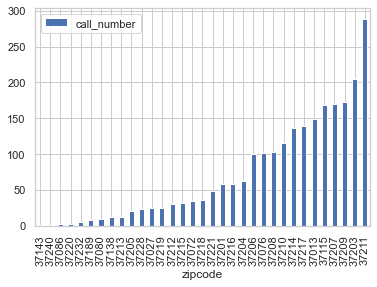

In [69]:
robbery_calls.sort_values('call_number').plot(kind = 'bar', 
                 x = 'zipcode', 
                 y = 'call_number');

Text(0.5, 1.0, 'Robbery Calls')

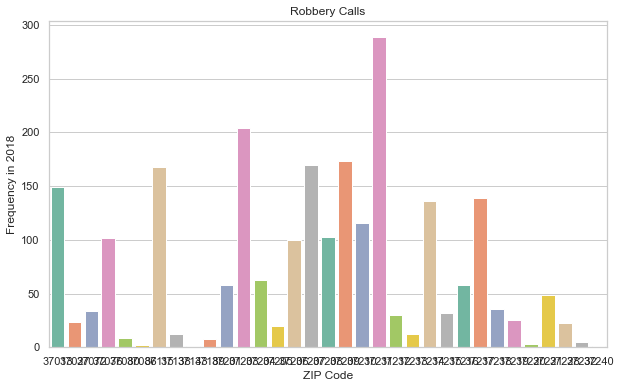

In [70]:
plt.figure(figsize = (10, 6))
sns.set(style="whitegrid")
sns.barplot(x = 'zipcode',
           y = 'call_number',
           data = robbery_calls,
           palette = 'Set2')
plt.xlabel('ZIP Code')
plt.ylabel('Frequency in 2018')
plt.title('Robbery Calls')

In [71]:
shooting_calls = calls_2018.loc[calls_2018['tencode_desc'].isin(['Shooting'])]
shooting_calls.shape

(276, 18)

In [72]:
shooting_calls = shooting_calls['zipcode'].value_counts()
shooting_calls.head()

37207    50
37208    34
37232    28
37203    26
37211    25
Name: zipcode, dtype: int64

In [73]:
shooting_calls = shooting_calls.reset_index()
shooting_calls.head()

,index,zipcode
0,37207,50
1,37208,34
2,37232,28
3,37203,26
4,37211,25


In [74]:
shooting_calls.columns = ['zipcode', 'call_number']
shooting_calls.head()

,zipcode,call_number
0,37207,50
1,37208,34
2,37232,28
3,37203,26
4,37211,25


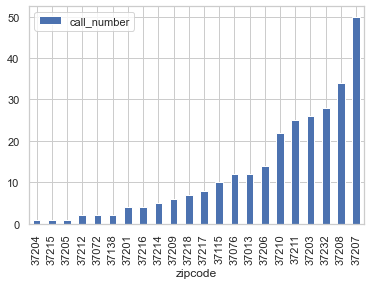

In [75]:
shooting_calls.sort_values('call_number').plot(kind = 'bar', 
                 x = 'zipcode', 
                 y = 'call_number');

Text(0.5, 1.0, 'Shooting Calls')

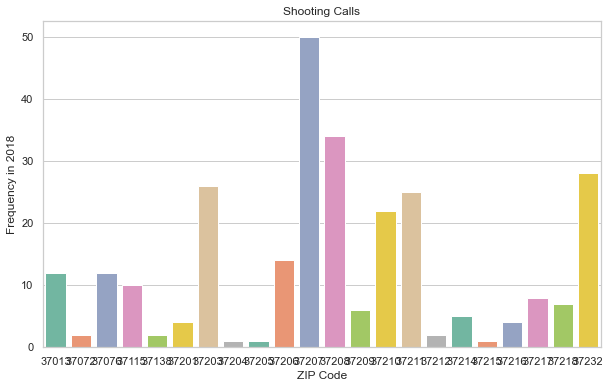

In [76]:
plt.figure(figsize = (10, 6))
sns.set(style="whitegrid")
sns.barplot(x = 'zipcode',
           y = 'call_number',
           data = shooting_calls,
           palette = 'Set2')
plt.xlabel('ZIP Code')
plt.ylabel('Frequency in 2018')
plt.title('Shooting Calls')

In [77]:
stab_calls = calls_2018.loc[calls_2018['tencode_desc'].isin(['Cutting / Stabbing'])]
stab_calls.shape

(106, 18)

In [78]:
stab_calls = stab_calls['zipcode'].value_counts()
stab_calls.head()

37208    13
37115    11
37203     9
37207     9
37211     9
Name: zipcode, dtype: int64

In [79]:
stab_calls = stab_calls.reset_index()
stab_calls.columns = ['zipcode', 'call_number']

In [80]:
stab_calls.head()

,zipcode,call_number
0,37208,13
1,37115,11
2,37203,9
3,37207,9
4,37211,9


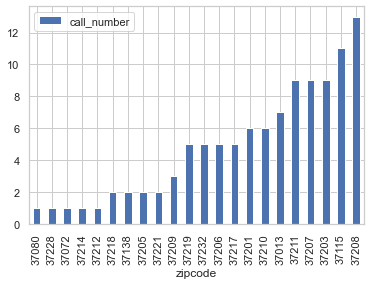

In [81]:
stab_calls.sort_values('call_number').plot(kind = 'bar', 
                 x = 'zipcode', 
                 y = 'call_number');

Text(0.5, 1.0, 'Stabbing Calls')

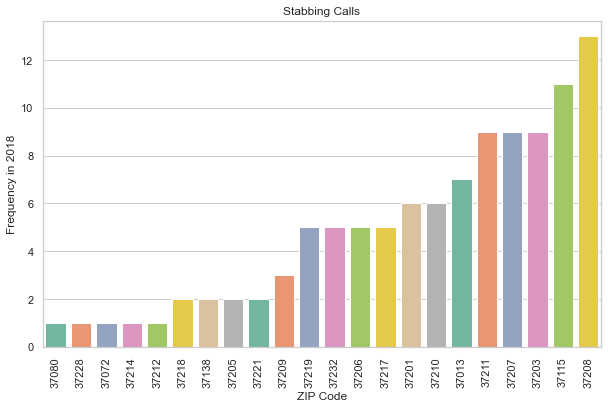

In [82]:
plt.figure(figsize = (10, 6))
sns.set(style="whitegrid")
sns.barplot(x = 'zipcode',
           y = 'call_number',
           data = stab_calls,
           palette = 'Set2',
           order = stab_calls.sort_values('call_number').zipcode)
plt.xlabel('ZIP Code')
plt.ylabel('Frequency in 2018')
plt.xticks(rotation=90)
plt.title('Stabbing Calls')

In [83]:
#data on months
calls_2018['call_received'] = pd.to_datetime(calls_2018['call_received'], 
                                          format = '%m/%d/%Y %I:%M:%S %p')

In [84]:
calls_2018.head()

,event_number,call_received,complaint_number,shift,tencode,tencode_desc,disp_code,disp_desc,block,street_name,unit_disp,sector,zone,lat,lon,geometry,zipcode,po
0,PD201800174484,2018-02-16 19:09:00,20180155542,B,93,Traffic Violation,3,CITATION - TRAFFIC,600.0,ALBANY DR,521B,H,23,36.210,-86.600,POINT (-86.59999999999999 36.21),37076,HERMITAGE
1,PD201800174650,2018-02-16 20:02:00,20180155684,B,93,Traffic Violation,9,SUBJECT WARNED,5800.0,OLD HICKORY BLVD,5F34,H,21,36.169,-86.601,POINT (-86.601 36.169),37076,HERMITAGE
2,PD201800175038,2018-02-16 22:16:00,20180156001,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,3700.0,JAMES KAY LN,521B,H,21,36.178,-86.616,POINT (-86.616 36.178),37076,HERMITAGE
3,PD201800174217,2018-02-16 17:58:00,20180155321,B,87,Safety Hazard,3,CITATION - TRAFFIC,0.0,MM 221 4 I40 E,5122,H,23,36.170,-86.591,POINT (-86.59100000000001 36.17),37076,HERMITAGE
4,PD201800173907,2018-02-16 16:19:00,20180155047,B,93,Traffic Violation,9,SUBJECT WARNED,1300.0,TULIP GROVE RD,521B,H,23,36.175,-86.596,POINT (-86.596 36.175),37076,HERMITAGE


In [85]:
calls_2018['month'] = calls_2018['call_received'].dt.month
calls_2018.head()

,event_number,call_received,complaint_number,shift,tencode,tencode_desc,disp_code,disp_desc,block,street_name,unit_disp,sector,zone,lat,lon,geometry,zipcode,po,month
0,PD201800174484,2018-02-16 19:09:00,20180155542,B,93,Traffic Violation,3,CITATION - TRAFFIC,600.0,ALBANY DR,521B,H,23,36.210,-86.600,POINT (-86.59999999999999 36.21),37076,HERMITAGE,2
1,PD201800174650,2018-02-16 20:02:00,20180155684,B,93,Traffic Violation,9,SUBJECT WARNED,5800.0,OLD HICKORY BLVD,5F34,H,21,36.169,-86.601,POINT (-86.601 36.169),37076,HERMITAGE,2
2,PD201800175038,2018-02-16 22:16:00,20180156001,B,3,Administrative/Special Assignment,6,ASSISTED OTHER UNIT,3700.0,JAMES KAY LN,521B,H,21,36.178,-86.616,POINT (-86.616 36.178),37076,HERMITAGE,2
3,PD201800174217,2018-02-16 17:58:00,20180155321,B,87,Safety Hazard,3,CITATION - TRAFFIC,0.0,MM 221 4 I40 E,5122,H,23,36.170,-86.591,POINT (-86.59100000000001 36.17),37076,HERMITAGE,2
4,PD201800173907,2018-02-16 16:19:00,20180155047,B,93,Traffic Violation,9,SUBJECT WARNED,1300.0,TULIP GROVE RD,521B,H,23,36.175,-86.596,POINT (-86.596 36.175),37076,HERMITAGE,2


In [86]:
month_freq = calls_2018['month'].value_counts()

In [87]:
month_freq.head()

1    95780
3    91051
5    86463
8    84690
6    84619
Name: month, dtype: int64

In [88]:
month_freq = month_freq.reset_index()
month_freq.head()

,index,month
0,1,95780
1,3,91051
2,5,86463
3,8,84690
4,6,84619


In [89]:
month_freq.columns = ['month', 'frequency']
month_freq.head()

,month,frequency
0,1,95780
1,3,91051
2,5,86463
3,8,84690
4,6,84619


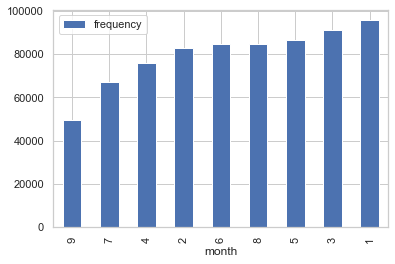

In [90]:
month_freq.sort_values('frequency').plot(kind = 'bar', 
                 x = 'month', 
                 y = 'frequency');

Text(0.5, 1.0, 'Total Police Calls')

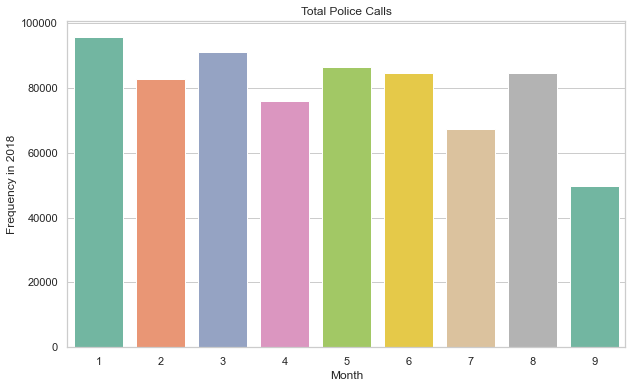

In [91]:
plt.figure(figsize = (10, 6))
sns.set(style="whitegrid")
sns.barplot(x = 'month',
           y = 'frequency',
           data = month_freq,
           palette = 'Set2')
plt.xlabel('Month')
plt.ylabel('Frequency in 2018')
plt.title('Total Police Calls')

In [92]:
#frequency of problem crime by months
problem_calls = calls_2018.loc[calls_2018['tencode_desc'].isin(['Burglary - Residence', 'Fight / Assault', 'Holdup / Robbery', 'Shooting', 'Cutting / Stabbing'])]

In [93]:
problem_calls.head()

,event_number,call_received,complaint_number,shift,tencode,tencode_desc,disp_code,disp_desc,block,street_name,unit_disp,sector,zone,lat,lon,geometry,zipcode,po,month
15,PD201800173891,2018-02-16 16:13:00,20180155057,B,70,Burglary - Residence,6,ASSISTED OTHER UNIT,100.0,TULIP GROVE PT,522B,H,23,36.180,-86.597,POINT (-86.59700000000001 36.18),37076,HERMITAGE,2
17,PD201800174151,2018-02-16 17:39:00,20180155313,B,57,Fight / Assault,5,GONE ON ARRIVAL,5600.0,FRIST BLVD,521B,H,21,36.176,-86.608,POINT (-86.60799999999999 36.176),37076,HERMITAGE,2
18,PD201800174764,2018-02-16 20:43:00,0,B,70,Burglary - Residence,11,DISREGARD / SIGNAL 9,400.0,ROCKWOOD DR,NaN,H,23,36.176,-86.596,POINT (-86.596 36.176),37076,HERMITAGE,2
57,PD201800176186,2018-02-17 07:58:00,20180157061,A,70,Burglary - Residence,11,DISREGARD / SIGNAL 9,3100.0,EARHART RD,523A,H,23,36.167,-86.571,POINT (-86.571 36.167),37076,HERMITAGE,2
87,PD201800177095,2018-02-17 16:42:00,0,B,70,Burglary - Residence,11,DISREGARD / SIGNAL 9,200.0,SCOTTS CREEK TRL,NaN,H,23,36.204,-86.593,POINT (-86.59299999999999 36.204),37076,HERMITAGE,2


In [94]:
problem_month_freq = problem_calls['month'].value_counts()

In [95]:
problem_month_freq.head()

5    3417
6    3396
8    3230
3    3027
1    2858
Name: month, dtype: int64

In [96]:
problem_month_freq = problem_month_freq.reset_index()
problem_month_freq.head()

,index,month
0,5,3417
1,6,3396
2,8,3230
3,3,3027
4,1,2858


In [97]:
problem_month_freq.columns = ['month', 'frequency']
problem_month_freq.head()

,month,frequency
0,5,3417
1,6,3396
2,8,3230
3,3,3027
4,1,2858


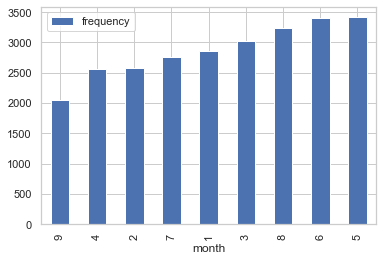

In [98]:
problem_month_freq.sort_values('frequency').plot(kind = 'bar', 
                 x = 'month', 
                 y = 'frequency');

Text(0.5, 1.0, 'Criminal Activity Calls')

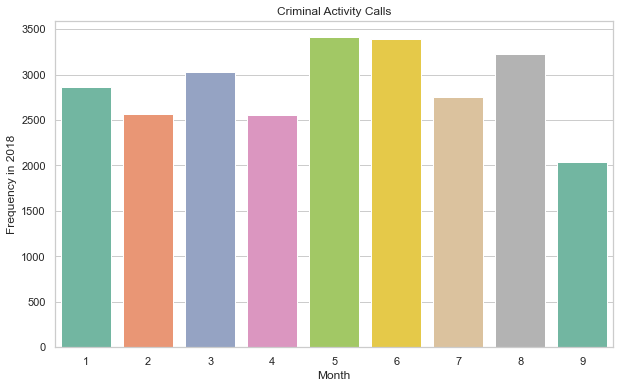

In [99]:
plt.figure(figsize = (10, 6))
sns.set(style="whitegrid")
sns.barplot(x = 'month',
           y = 'frequency',
           data = problem_month_freq,
           palette = 'Set2')
plt.xlabel('Month')
plt.ylabel('Frequency in 2018')
plt.title('Criminal Activity Calls')

In [100]:
#comparing to hub zip to problem zips above
hub.head()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,Zipcode,Latitude,Longitude
0,45480,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:20,02/12/2018 03:48:14 PM,Phone,37115.0,36.296917,-86.699162
1,45482,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:21,02/12/2018 03:49:13 PM,Phone,37076.0,36.215403,-86.588513
2,43742,Closed,"Trash, Recycling & Litter",Litter,Litter,2018-02-02 21:18:15,02/07/2018 05:04:33 PM,Phone,37076.0,36.187902,-86.607286
3,49069,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-23 23:27:07,02/27/2018 09:06:16 PM,hubNashville Community,37203.0,36.153761,-86.788745
4,44743,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-08 14:00:04,02/08/2018 03:01:50 PM,Phone,37210.0,36.154836,-86.763345


In [101]:
hub.shape

(81166, 11)

In [102]:
hub['Zipcode'].unique()

array([37115., 37076., 37203., 37210., 37205., 37211., 37220., 37221.,
       37189., 37206., 37209., 37204., 37214., 37218., 37138., 37215.,
       37217., 37207., 37080., 37013., 37216., 37213., 37201., 37015.,
       37208., 37219., 37027., 37212., 37072., 37143., 37064., 37228.,
       37152., 37135., 37086., 37122.,     0., 37232.])

In [103]:
hub['Zipcode'] = hub['Zipcode'].astype(str)

In [104]:
hub.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81166 entries, 0 to 81165
Data columns (total 11 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Request #                   81166 non-null  int64  
 1   Status                      81166 non-null  object 
 2   Request Type                81166 non-null  object 
 3   Subrequest Type             81166 non-null  object 
 4   Additional Subrequest Type  81148 non-null  object 
 5   Date / Time Opened          81166 non-null  object 
 6   Date / Time Closed          80866 non-null  object 
 7   Request Origin              81166 non-null  object 
 8   Zipcode                     81166 non-null  object 
 9   Latitude                    81166 non-null  float64
 10  Longitude                   81166 non-null  float64
dtypes: float64(2), int64(1), object(8)
memory usage: 6.8+ MB


In [105]:
prob_zip = hub.loc[hub['Zipcode'].isin(['37207.0', '37208.0', '37211.0'])]

In [106]:
prob_zip.head()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,Zipcode,Latitude,Longitude
6,45079,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-09 14:00:20,02/09/2018 02:55:30 PM,Phone,37211.0,36.082671,-86.710496
15,43548,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-02 14:00:17,02/02/2018 04:19:02 PM,Phone,37211.0,36.079102,-86.720540
30,45081,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-09 14:00:22,02/09/2018 03:03:32 PM,Phone,37207.0,36.221699,-86.761674
38,45163,Closed,Other,Other,Other,2018-02-09 15:54:29,02/09/2018 07:26:24 PM,hubNashville Community,37211.0,36.085846,-86.739189
43,45286,Closed,"Trash, Recycling & Litter",Litter,Litter,2018-02-09 20:22:58,03/09/2018 09:02:20 PM,Phone,37207.0,36.279558,-86.783572


In [107]:
prob_zip.shape

(17401, 11)

In [108]:
prob_zip['Request Type'].unique()

array(['Streets, Roads & Sidewalks', 'Other', 'Trash, Recycling & Litter',
       'Public Safety', 'Electric & Water General', 'Property Violations',
       'Resolved by hubNashville on First Call',
       'Social Services & Housing', 'Education & Libraries', 'Parks',
       'Permits', 'Transit', 'Planning & Zoning', 'Quick Requests'],
      dtype=object)

In [109]:
prob_zip.groupby('Zipcode')['Request Type'].describe()

,count,unique,top,freq
Zipcode,,,,
37207.0,5606,13,"Trash, Recycling & Litter",3269
37208.0,4925,13,"Trash, Recycling & Litter",2727
37211.0,6870,13,"Trash, Recycling & Litter",3713


In [110]:
#53% of all requests are for trash, recycling and litter 
hub['Request Type'].describe()

count                         81166
unique                           16
top       Trash, Recycling & Litter
freq                          43359
Name: Request Type, dtype: object

In [111]:
hub['Date / Time Opened'] = pd.to_datetime(hub['Date / Time Opened'])

In [112]:
hub['Date / Time Closed'] = pd.to_datetime(hub['Date / Time Closed'])

In [113]:
hub['resolution_time'] = hub['Date / Time Closed'] - hub['Date / Time Opened']

In [114]:
hub.head()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,Zipcode,Latitude,Longitude,resolution_time
0,45480,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:20,2018-02-12 15:48:14,Phone,37115.0,36.296917,-86.699162,0 days 01:47:54
1,45482,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-12 14:00:21,2018-02-12 15:49:13,Phone,37076.0,36.215403,-86.588513,0 days 01:48:52
2,43742,Closed,"Trash, Recycling & Litter",Litter,Litter,2018-02-02 21:18:15,2018-02-07 17:04:33,Phone,37076.0,36.187902,-86.607286,4 days 19:46:18
3,49069,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-23 23:27:07,2018-02-27 21:06:16,hubNashville Community,37203.0,36.153761,-86.788745,3 days 21:39:09
4,44743,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-08 14:00:04,2018-02-08 15:01:50,Phone,37210.0,36.154836,-86.763345,0 days 01:01:46


In [115]:
hub['Request Type'].unique

<bound method Series.unique of 0        Streets, Roads & Sidewalks
1        Streets, Roads & Sidewalks
2         Trash, Recycling & Litter
3        Streets, Roads & Sidewalks
4        Streets, Roads & Sidewalks
                    ...            
81161    Streets, Roads & Sidewalks
81162    Streets, Roads & Sidewalks
81163    Streets, Roads & Sidewalks
81164           Property Violations
81165                 Public Safety
Name: Request Type, Length: 81166, dtype: object>

In [116]:
prob_zip = hub.loc[hub['Zipcode'].isin(['37207.0', '37208.0', '37211.0'])]

In [117]:
prob_zip.head()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,Zipcode,Latitude,Longitude,resolution_time
6,45079,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-09 14:00:20,2018-02-09 14:55:30,Phone,37211.0,36.082671,-86.710496,0 days 00:55:10
15,43548,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-02 14:00:17,2018-02-02 16:19:02,Phone,37211.0,36.079102,-86.720540,0 days 02:18:45
30,45081,Closed,"Streets, Roads & Sidewalks",Blocking the Right of Way,Blocking the Right of Way,2018-02-09 14:00:22,2018-02-09 15:03:32,Phone,37207.0,36.221699,-86.761674,0 days 01:03:10
38,45163,Closed,Other,Other,Other,2018-02-09 15:54:29,2018-02-09 19:26:24,hubNashville Community,37211.0,36.085846,-86.739189,0 days 03:31:55
43,45286,Closed,"Trash, Recycling & Litter",Litter,Litter,2018-02-09 20:22:58,2018-03-09 21:02:20,Phone,37207.0,36.279558,-86.783572,28 days 00:39:22


In [118]:
prob_zip.groupby('Zipcode')['resolution_time'].describe()

,count,mean,std,min,25%,50%,75%,max
Zipcode,,,,,,,,
37207.0,5589,13 days 22:08:33.574879227,47 days 22:27:45.908747748,0 days,0 days 23:31:00,2 days 06:07:00,6 days 17:15:55,888 days 01:06:19
37208.0,4906,18 days 21:04:30.795964125,47 days 20:06:32.649985997,0 days,1 days 05:53:00,3 days 20:09:00,11 days 22:20:45,785 days 13:43:43
37211.0,6849,14 days 11:31:03.892831070,42 days 18:34:36.808013507,0 days,1 days 01:14:07,3 days 01:11:00,7 days 00:49:00,815 days 07:16:14


In [119]:
trash_req = hub.loc[hub['Request Type'] == 'Trash, Recycling & Litter']

In [120]:
trash_req.head()

,Request #,Status,Request Type,Subrequest Type,Additional Subrequest Type,Date / Time Opened,Date / Time Closed,Request Origin,Zipcode,Latitude,Longitude,resolution_time
2,43742,Closed,"Trash, Recycling & Litter",Litter,Litter,2018-02-02 21:18:15,2018-02-07 17:04:33,Phone,37076.0,36.187902,-86.607286,4 days 19:46:18
13,45263,Closed,"Trash, Recycling & Litter",Recycle Cart Stolen / Moved to Home with No Re...,Recycle Cart Stolen / Moved to Home with No Re...,2018-02-09 19:33:50,2018-02-17 17:03:39,Phone,37204.0,36.124122,-86.784110,7 days 21:29:49
36,49015,Closed,"Trash, Recycling & Litter",Brush Collection,Brush Collection,2018-02-23 21:40:19,2018-02-23 23:00:21,hubNashville Community,37214.0,36.137036,-86.638977,0 days 01:20:02
43,45286,Closed,"Trash, Recycling & Litter",Litter,Litter,2018-02-09 20:22:58,2018-03-09 21:02:20,Phone,37207.0,36.279558,-86.783572,28 days 00:39:22
55,45345,Closed,"Trash, Recycling & Litter",Recycle Cart Stolen / Moved to Home with No Re...,Recycle Cart Stolen / Moved to Home with No Re...,2018-02-09 22:14:37,2018-02-14 10:04:01,Phone,37204.0,36.100166,-86.790401,4 days 11:49:24


In [121]:
trash_req['Zipcode'].value_counts()

37013.0    4026
37209.0    3960
37206.0    3853
37211.0    3713
37207.0    3269
37115.0    3209
37208.0    2727
37205.0    2164
37216.0    2151
37215.0    2063
37214.0    1799
37212.0    1715
37204.0    1559
37217.0    1544
37210.0    1400
37203.0    1254
37218.0    1220
37027.0     466
37220.0     365
37221.0     191
37189.0     160
37219.0     146
37076.0     119
37201.0     109
37138.0      65
37072.0      38
37080.0      23
37228.0      22
37213.0       9
37135.0       7
37015.0       7
37086.0       3
37143.0       2
0.0           1
Name: Zipcode, dtype: int64

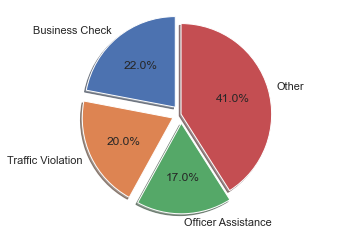

In [122]:
labels = 'Business Check', 'Traffic Violation', 'Officer Assistance', 'Other'
sizes = [22, 20, 17, 41]
explode = (0.1,0.1,0.1,0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)
ax1.axis('equal')

plt.show()

In [123]:
conn = sql.connect('../data/metro_survey.db')
cur = conn.cursor()

In [124]:
cur.execute("SELECT name FROM sqlite_master WHERE type='table' ORDER BY name;")

In [125]:
available_tables = (cur.fetchall())
available_tables

[('codes',),
 ('equality_and_access',),
 ('general_services',),
 ('info',),
 ('overall',),
 ('recreation',),
 ('safety',),
 ('transportation',)]

In [126]:
query = '''
SELECT *
FROM overall
LIMIT 10;
'''
pd.read_sql(query, conn)

,Id,Metro Services - Overall,Value Received from Taxes,Elected Official Leadership,Metro Transparency and Ethics,Customer Service,Metro Communication,Decision Input Opportunity
0,1,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral,Neutral
1,2,Satisfied,Satisfied,Neutral,Neutral,Satisfied,Satisfied,Dissatisfied
2,3,Satisfied,Satisfied,Satisfied,Neutral,Neutral,Satisfied,Satisfied
3,4,Satisfied,Very Satisfied,Satisfied,Satisfied,Don't Know,Satisfied,Satisfied
4,5,Satisfied,Satisfied,Satisfied,Neutral,Satisfied,Satisfied,Don't Know
5,6,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied,Very Satisfied
6,7,Satisfied,Satisfied,Neutral,Neutral,Satisfied,Satisfied,Very Dissatisfied
7,8,Satisfied,Satisfied,Satisfied,Don't Know,Satisfied,Satisfied,Don't Know
8,9,Satisfied,Neutral,Satisfied,Don't Know,Satisfied,Satisfied,Satisfied
9,10,Neutral,Dissatisfied,Neutral,Dissatisfied,Don't Know,Don't Know,Satisfied


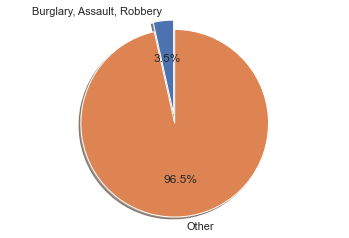

In [127]:
labels = 'Burglary, Assault, Robbery', 'Other'
sizes = [3.5, 96.5]
explode = (0.1,0)

fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, labels=labels, autopct='%1.1f%%',
       shadow=True, startangle=90)
ax1.axis('equal')

plt.show()